In [2]:
import sys
sys.path.insert(0, "../../python")

from propagation import plasma
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

Completed time slice  1  of  64
Completed time slice  2  of  64
Completed time slice  3  of  64
Completed time slice  4  of  64
Completed time slice  5  of  64
Completed time slice  6  of  64
Completed time slice  7  of  64
Completed time slice  8  of  64
Completed time slice  9  of  64
Completed time slice  10  of  64
Completed time slice  11  of  64
Completed time slice  12  of  64
Completed time slice  13  of  64
Completed time slice  14  of  64
Completed time slice  15  of  64
Completed time slice  16  of  64
Completed time slice  17  of  64
Completed time slice  18  of  64
Completed time slice  19  of  64
Completed time slice  20  of  64
Completed time slice  21  of  64
Completed time slice  22  of  64
Completed time slice  23  of  64
Completed time slice  24  of  64
Completed time slice  25  of  64
Completed time slice  26  of  64
Completed time slice  27  of  64
Completed time slice  28  of  64
Completed time slice  29  of  64
Completed time slice  30  of  64
Completed time slic

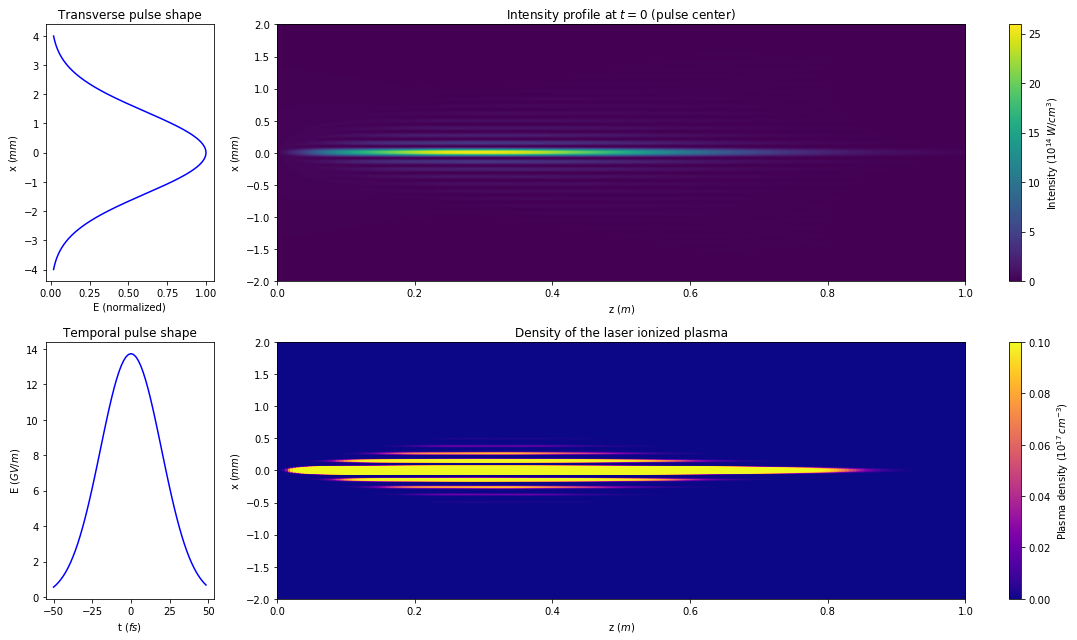

In [6]:
# Initial electric field
def Efunc(x, y):
    # Input Gaussian beam
    w0 = 2e3
    r2 = x**2 + y**2
    E0 = np.exp(-r2 / w0**2)
    # Axicon lens
    alpha = np.radians(0.5)
    T0 = np.exp(-1j*np.pi*alpha*np.sqrt(r2))
    # Initial electric field
    return E0 * T0

# Temporal pulse
def Tfunc(t):
    from ionization import ionization
    tau = 35
    return ionization.gaussian_envelope(0.25, t, tau).real

# Setup the parameters
params = {'Nx' : 2**10,
          'Ny' : 2**8,
          'Nz' : 2**8,
          'Nt' : 2**6,
          'X' : 8000,
          'Y' : 8000,
          'Z' : 1e6,
          'T' : 100,
          'n0' : 1.0,
          'E0' : 1.0,
          'alpha' : 0.667,
          'EI' : 13.5984,
          'lam' : 0.8
          }

path = 'C:/Users/robert/Documents/Research/Data/Plasma_Refraction_Function/'

n0 = [0.1]
for i in range(0, 1):
    params['n0'] = n0[i]
    directory = 'intensity-0.1_density-' + str(params['n0'])
    params['path'] = path + directory+'/'
    # Create the directory if it doesn't exist
    if not os.path.exists(params['path']):
        os.makedirs(params['path'])
    # Run the simulation      
    plasma.plasma_refraction(params, Efunc, Tfunc)
    # Create the summary
    plasma.summary_plot(params['path'])